# Введение в анализ данных
## Домашнее задание 2. `Pandas` и `Seaborn`


**Правила:**

* Дедлайн **30 апреля 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту `mipt.stats@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 2"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` -- ваш номер из таблицы с оценками. *pdf-версию можно сделать с помощью Ctrl+P. Пожалуйста, посмотрите ее полностью перед отправкой. Если что-то существенное не напечатается в pdf, то баллы могут быть снижены.*
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код при проверке запускаться не будет.

**Баллы за задание:**

Легкая часть (достаточно на "хор"):

* Задача 1 -- 4 балла
* Задача 2 -- 2 балла

Сложная часть (необходимо на "отл"):

* Задача 3 -- 5 баллов
* Задача 4 -- 3 балла
* Задача 5 -- 8 баллов

Баллы за разные части суммируются отдельно, нормируются впоследствии также отдельно. Иначе говоря, 1 балл за легкую часть может быть не равен 1 баллу за сложную часть.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3)
%matplotlib inline

## Легкая часть

### Задача 1

Представьте, что вы министр образования страны котиков. Вам нужно решить какие школы лучше: маленькие или большие.

Вы решили, что нужно сравнить их по результатам единого кошачьего экзамена (ЕКЭ). Предлагается посмотреть на средний результат по школам: отсортировать по нему и сделать выводы исходя из топ 10 лучших школ.

Вам дан датасет `cat_exam_data.csv`

Описание данных:

* `school` -- номер школы;
* `test_score` -- результат одного ученика из этой школы;
* `number_of_students` -- кол-во учеников в школе.

Приведены данные по всем ученикам из 500 школ страны котиков.

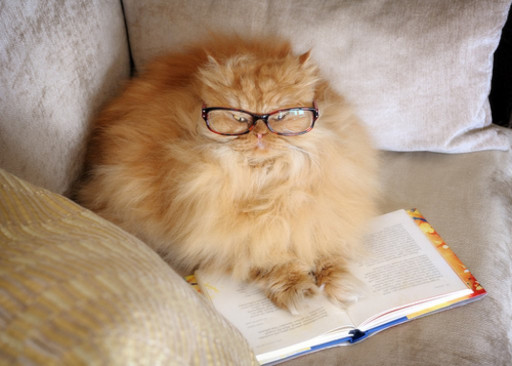

Загрузите датасет с результатами экзамена и посмотрите на первые пять строк.

Это можно сделать с помощью методов  <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html">head</a>.

In [2]:
cat_exam_data = pd.read_csv('cat_exam_data.csv')


In [3]:
cat_exam_data.head(5)


,school,test_score,number_of_students
0,26,39.0,965
1,54,64.0,1483
2,356,64.0,1055
3,108,68.0,1806
4,298,78.0,971


Проверьте, что в данных нет пропусков (`NaN`). Если они есть:
* проверьте в каком столбце;
* удалите их.

Могут помочь методы <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html">isna</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html">dropna</a>.

In [4]:
cat_exam_data.isna().sum()


school                  0
test_score            204
number_of_students      0
dtype: int64

In [5]:
cat_exam_data.dropna(inplace=True)


Посчитайте описательные статистики (среднее, мин, макс, и тд.) по колонкам в таблице с помощью одной функции:

In [6]:
cat_exam_data.describe()


,school,test_score,number_of_students
count,501358.000000,501358.000000,501358.000000
mean,250.096795,51.681788,1088.910569
std,144.428420,14.179981,281.016801
min,0.000000,0.000000,156.000000
25%,125.000000,42.000000,890.000000
50%,250.000000,52.000000,1079.000000
75%,377.000000,61.000000,1285.000000
max,499.000000,100.000000,1806.000000


Посчитайте сколько котиков получили 100 баллов:

In [7]:
cat_exam_data[cat_exam_data.test_score == 100].test_score.count()


51

Выведите информацию о школах, где есть хотя бы один котик, получивший 100 баллов на ЕКЭ.

Отсортируйте эти школы по количеству стобалльников.

Могут помочь методы <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">groupby</a>, <a href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.sort_values.html">sort_values</a>, <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html">transform</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html">count</a>.

In [8]:
cat_exam_data[cat_exam_data.test_score == 100].groupby(['school', 'number_of_students'], as_index=False)\
                    .count().sort_values('test_score', ascending=False).reset_index()


,index,school,number_of_students,test_score
0,48,486,800,2
1,0,4,1015,1
2,37,395,436,1
3,27,302,1517,1
4,28,303,701,1
5,29,315,580,1
6,30,328,789,1
7,31,342,920,1
8,32,346,913,1
9,33,351,1224,1


Посчитайте средний результат каждой из школ и посмотрите на результат:

Может помочь метод <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html">mean</a>.

In [9]:
cat_exam_mean = cat_exam_data.groupby(['school', 'number_of_students'], as_index=False)\
                .mean()
cat_exam_mean


,school,number_of_students,test_score
0,0,418,52.294258
1,1,1209,52.028950
2,2,1035,51.751451
3,3,1245,51.566265
4,4,1015,51.025641
...,...,...,...
495,495,1139,50.933275
496,496,1209,51.146402
497,497,1140,51.141228
498,498,796,51.709799


Отсортируйте школы по среднему результату:

In [10]:
cat_exam_mean.sort_values('test_score', ascending=False, inplace=True)
cat_exam_mean.reset_index(inplace=True)


Посмотрите на топ 10 лучших результатов:

In [11]:
cat_exam_mean.head(10)


,index,school,number_of_students,test_score
0,57,57,560,53.341682
1,124,124,598,52.993311
2,263,263,669,52.982063
3,82,82,555,52.981982
4,366,366,773,52.970207
5,465,465,1179,52.957555
6,169,169,858,52.932401
7,449,449,357,52.910364
8,477,477,808,52.898515
9,464,464,431,52.865429


**Вывод:** Лучшие по среднему баллу школы не обязательно имеют стобалльников. Большинство лучших школ имеют малое число учеников.

Ожидаем, что внизу рейтинга будут только большие школы, давайте это проверим.

Посмотрите теперь на 10 худших школ:

In [12]:
cat_exam_mean.tail(10)


,index,school,number_of_students,test_score
490,383,383,636,50.716981
491,264,264,929,50.702906
492,48,48,649,50.690293
493,156,156,1093,50.641354
494,394,394,1079,50.461538
495,194,194,774,50.406977
496,471,471,960,50.362500
497,486,486,800,50.325000
498,211,211,351,50.248571
499,353,353,336,50.050595


**Вывод:** В списке худших по среднему баллу школ также присутствуют маленькие школы.

Постройте график зависимости среднего результата ЕКЭ от количества учеников:

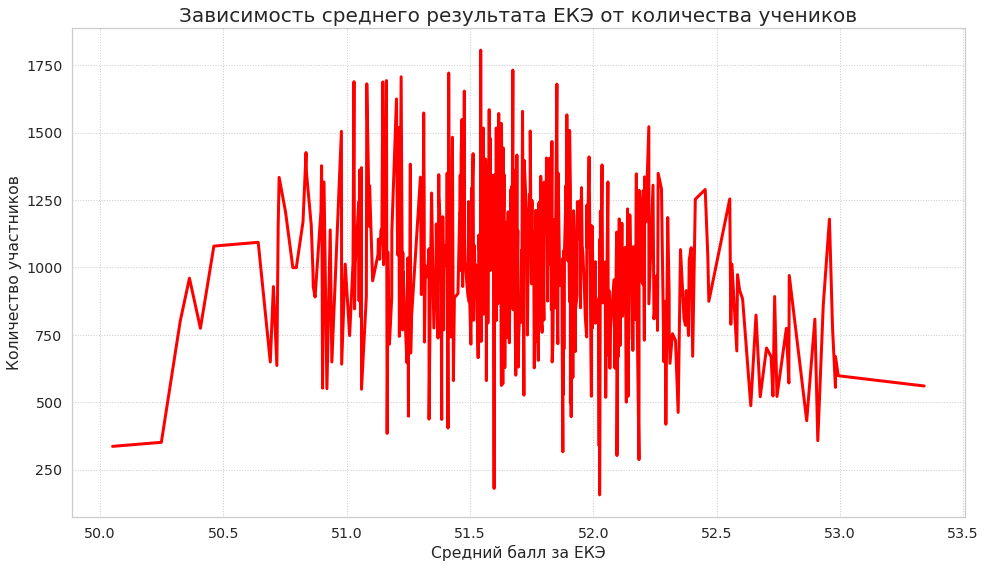

In [13]:
y = cat_exam_mean.number_of_students
x = cat_exam_mean.test_score

plt.figure(figsize=(16, 9))

plt.plot(
    x, 
    y, 
    color='red', 
    lw=3
)

plt.title('Зависимость среднего результата ЕКЭ от количества учеников', fontsize=20)
plt.xlabel('Средний балл за ЕКЭ')
plt.ylabel('Количество участников')
plt.grid(ls=':')
plt.show()


**Вывод:** По данному графику нельзя судить о зависимости между средним баллом и количеством учеников.

Но как же тогда решить какие школы лучше? 

Сгруппируйте учеников в зависимости от типа школы (<= 1000 учеников == маленькая школа):

In [14]:
cat_exam_small = cat_exam_mean[cat_exam_mean.number_of_students <= 1000]
cat_exam_large = cat_exam_mean[cat_exam_mean.number_of_students > 1000]


Постройте гистограммы этих двух выборок на одном графике, установив параметры
* `bins=10` --- число бинов гистограммы;
* `alpha=0.5` --- прозрачность бинов.

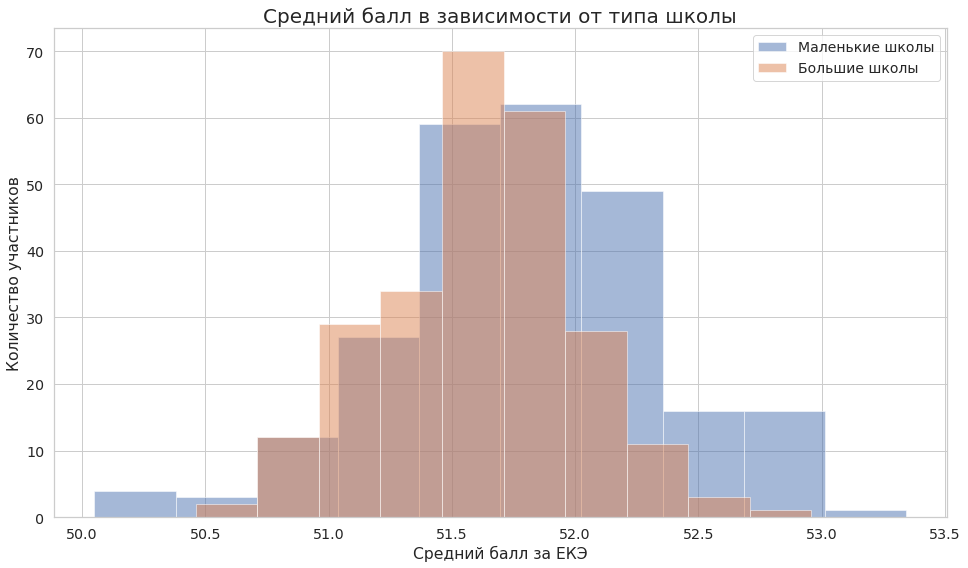

In [15]:
plt.figure(figsize=(16, 9))

plt.hist(
    cat_exam_small.test_score, 
    bins=10, 
    alpha=0.5, 
    label='Маленькие школы'
)

plt.hist(
    cat_exam_large.test_score, 
    bins=10, 
    alpha=0.5, 
    label='Большие школы'
)

plt.title('Средний балл в зависимости от типа школы', fontsize=20)
plt.legend(fontsize=14, loc=1)
plt.xlabel('Средний балл за ЕКЭ')
plt.ylabel('Количество участников')
plt.show()



**Вывод:** Разбиение на группы и использование гистограммы помогло в демонстрации зависимости среднего балла от количества учеников в школе. Видно, что в маленьких школах больше человек имеет более высокий средний балл.

---

### Задача 2

Задача заключается в работе с данными о трендах на YouTube. В этом вам поможет библиотека `seaborn`, которая была рассмотрена на одной из последних лекций.

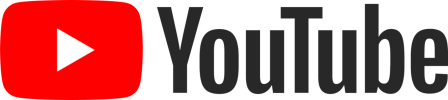


<b>1. Подготовка данных</b>

Скачайте файл `RUvideos_short.csv` с данными о видео в российском сегменте Youtube с 14 ноября по 21 ноября 2017 года. Полная версия данных доступна на <a href="https://www.kaggle.com/datasnaek/youtube-new#RUvideos.csv">kaggle</a>.

Прочитайте данные с помощью библиотеки `pandas` и напечатайте начало таблицы. В колонке `trending_date` записана дата. При чтении таблицы распознайте ее.

In [16]:
def dp(st):
    return pd.to_datetime(st, format='%y.%d.%m')

ru_vid = pd.read_csv('RUvideos_short.csv', parse_dates=[1], date_parser=dp)


In [17]:
ru_vid.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,2017-11-14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,2017-11-14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,2017-11-14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,2017-11-14,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,2017-11-14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


В таблице много лишних данных. Оставьте следующие столбцы:
* `trending_date` -- дата в формате год-день-месяц;
* `category_id` -- категория видео, названия приведены в файле `RU_category_id.json`;
* `views` -- количество просмотров видео;
* `likes` -- количество лайков;
* `dislikes` -- количество дислайков;
* `comment_count` -- количество комментариев.

Из даты оставьте только день. Для этого можно пройтись циклом по всем датам и взять поле `day` у даты. Напечатайте начало таблицы.

In [18]:
ru_vid = ru_vid[['trending_date', 'category_id', 'views', 'likes', 'dislikes', 'comment_count']]
ru_vid.trending_date = ru_vid.trending_date.transform(lambda x : x.day)
ru_vid.head()


,trending_date,category_id,views,likes,dislikes,comment_count
0,14,22,62408,334,190,50
1,14,22,330043,43841,2244,2977
2,14,24,424596,49854,714,2944
3,14,22,112851,3566,122,80
4,14,24,243469,36216,631,1692


<b>2. Некоторая визуализация</b>

Постройте ящики с усами на каждый день по количеству просмотров. Насколько хороший получился график?

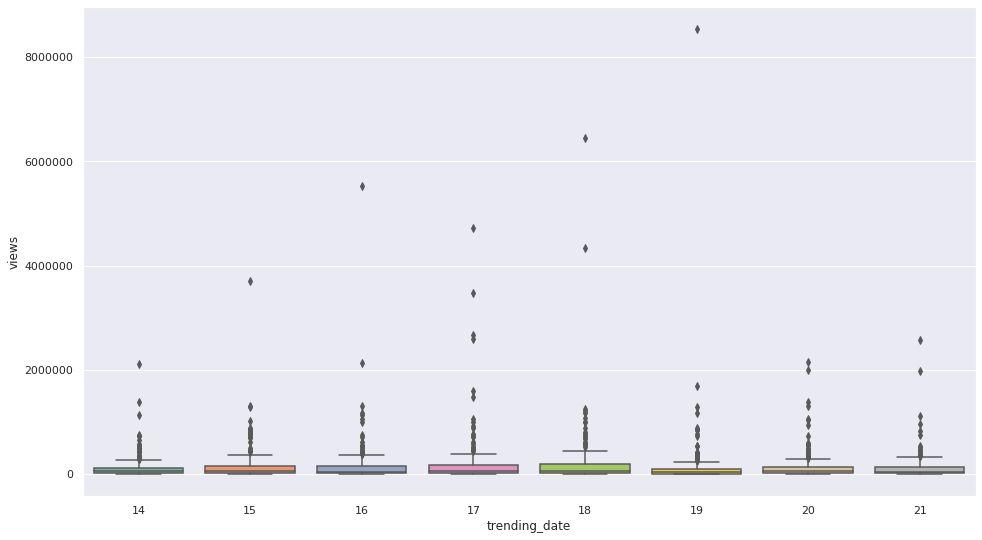

In [19]:
sns.set(style='darkgrid')

plt.figure(figsize=(16, 9))

sns.boxplot(x='trending_date', y='views', data=ru_vid, palette='Set2');


Исправьте этот недостаток, установив некоторое значение. 

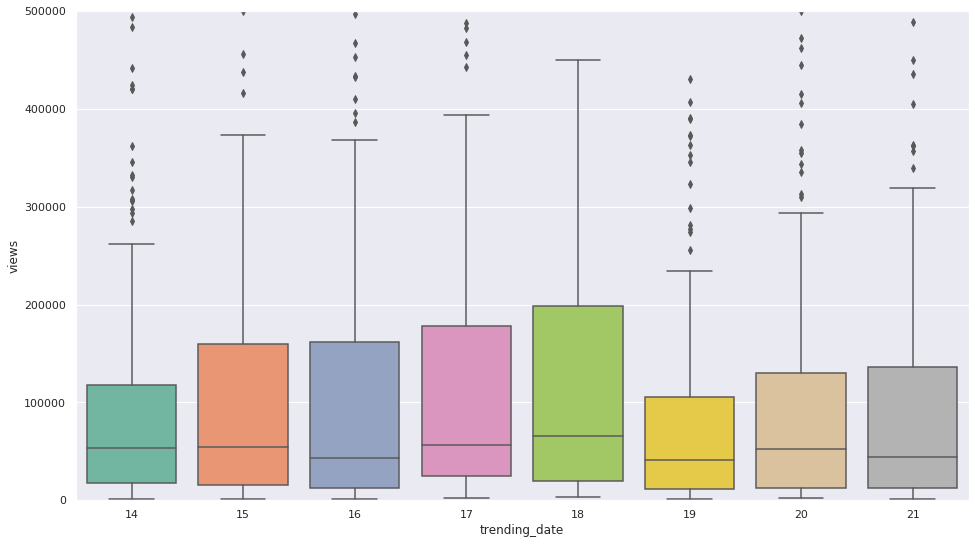

In [20]:
plt.figure(figsize=(16, 9))

sns.boxplot(x='trending_date', y='views', data=ru_vid, palette='Set2').set(ylim=(0, 5e5));


Постройте jointplot по всем данным для количества просмотров по горизонтальной оси и количества лайков по вертикальной. Насколько информативен такой график?

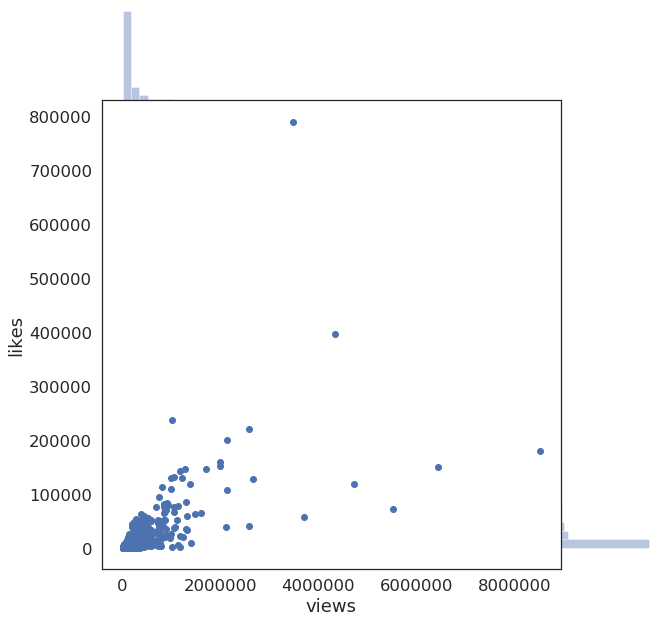

In [21]:
with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("white"):
    sns.jointplot(x='views',
                  y='likes',
                  data=ru_vid,
                  height=9,
                  space=0);
    

Исправьте этот недостаток.

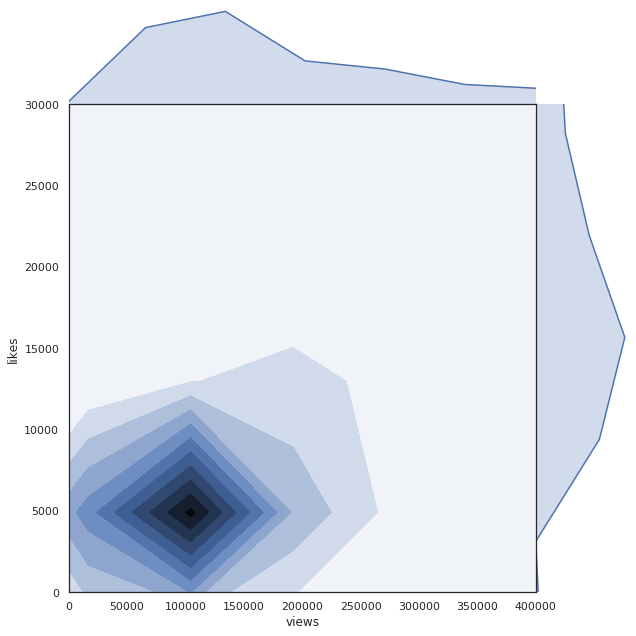

In [23]:
with sns.plotting_context("notebook", font_scale=1), sns.axes_style("white"):
    sns.jointplot(x='views',
                  y='likes',
                  data=ru_vid,
                  kind='kde',
                  height=9,
                  space=0,
                  xlim=(0, 4e5),
                  ylim=(0,3e4));
    


---
## Сложная часть

### Задача 3

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  


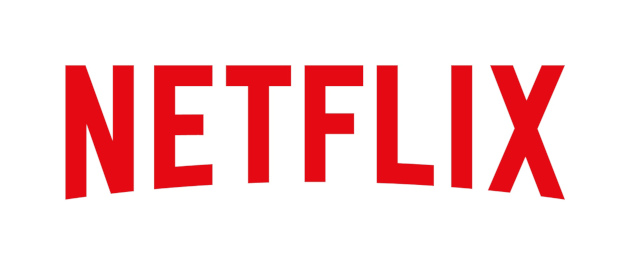

Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.


Загрузите данные, выполнив код ниже.

In [24]:
# код ниже менять нельзя (кроме пути до данных), просто запустите ячейку!
data = pd.read_csv('netflix_data.csv', encoding='cp437')
del data['ratingDescription'], data['user rating size']


Удалите из данных дупликаты. Сколько объектов удалено?

In [25]:
old_size = len(data)
data.drop_duplicates(inplace=True)
print('Удалено строк: ',old_size - len(data))


Удалено строк:  500


Сколько объектов осталось?

In [26]:
print('Осталось: ', len(data))


Осталось:  500


Сколько рейтинговых групп представлено в данных?

In [ ]:
len(data.rating.unique())


Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

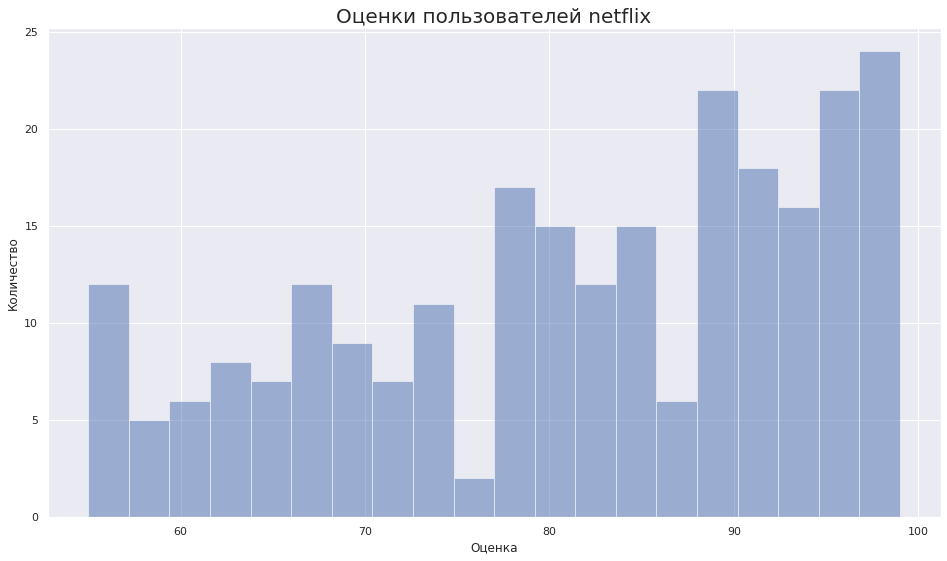

In [27]:
plt.figure(figsize=(16, 9))

plt.hist(
    data.dropna()['user rating score'], 
    bins=20, 
    alpha=0.5,
)


plt.title('Оценки пользователей netflix', fontsize=20)
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.show()


**Вывод:** Нет шоу с рейтингом ниже 50. оценок больше 80 в датасете больше, чем оценок меньше 80.

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [28]:
data.dropna()['user rating score'].describe()


count    246.000000
mean      81.390244
std       12.677883
min       55.000000
25%       71.000000
50%       83.500000
75%       92.750000
max       99.000000
Name: user rating score, dtype: float64

**Ответ:**  Медиана и среднее отличается примерно на 2 пункта. Нет, из курса теории вероятностей нам известно, что медиана от матожидания отличается не более чем на корень из дисперсии. Матожидание в данном случае играет роль среднего

В какие годы были запущены шоу, представленные в датасете?

In [29]:
data['release year'].unique()


array([2004, 2006, 2016, 2008, 2014, 2013, 2017, 2015, 2011, 2009, 2007,
       2012, 2003, 2001, 2010, 1998, 1999, 1978, 2005, 1993, 2002, 1976,
       1989, 1996, 1997, 2000, 1994, 1982, 1990, 1940, 1986, 1995, 1991,
       1992, 1987])

Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

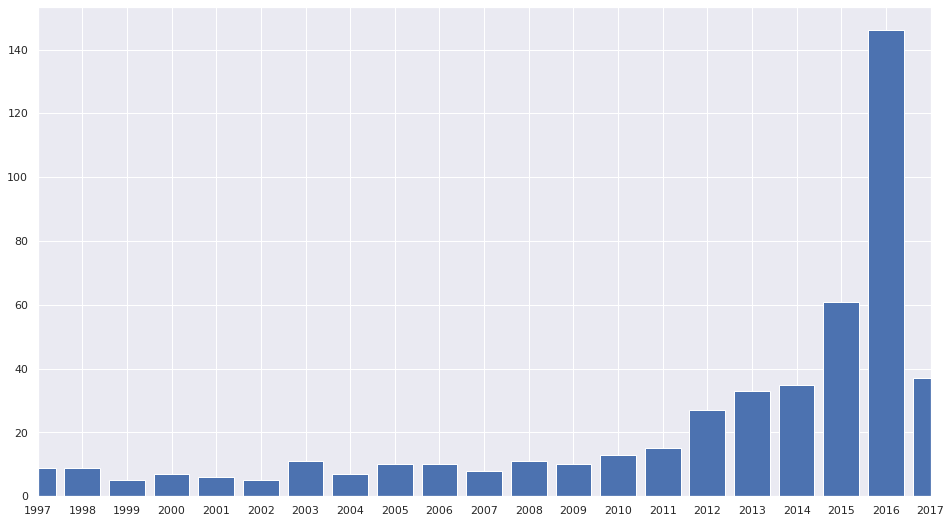

In [30]:
data_tmp = data[['release year', 'title']].groupby('release year', as_index=False).count()

plt.figure(figsize=(16,9))

plt.bar(
        x=data_tmp['release year'],
        height=data_tmp['title'],
        tick_label=data_tmp['release year'],
        )
plt.xlim((1997, 2017))
plt.show()


**Вывод:** В общем наблюдается рост, но имеем выброс.

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)
Ответить на этот вопрос вам поможет график, который вы построили выше.

In [31]:
data_tmp = data[['release year', 'user rating score']].groupby('release year').mean()

print('2016 - {}'.format(*data_tmp.loc[2016]))
print('2017 - {}'.format(*data_tmp.loc[2017]))


2016 - 84.31395348837209
2017 - 88.125


**Вывод:** Нет, мы не можем сделать такой вывод. В 2016 году было аномально много новых телешоу. Примерно в 3 раза больше, чем в 2017.

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройтре самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

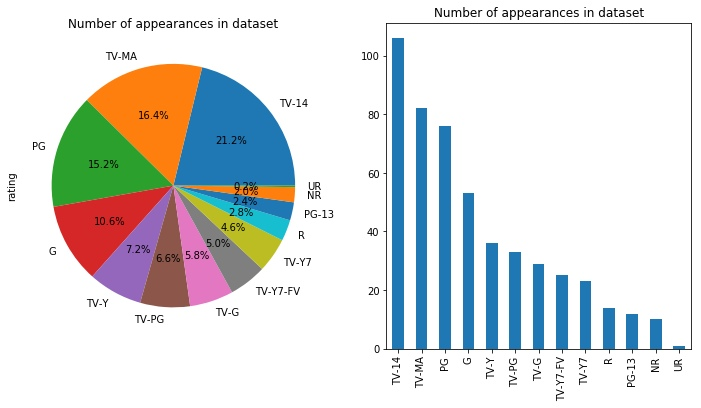

In [ ]:
...

**Вывод:** <...>

Составьте топ-13 самых высоко оцененных шоу. Выберите из данного топа шоу, которое вам наиболее нравится (либо используйте `scipy.stats.randint`). Обозначим это шоу N.
Ответьте на следующие вопросы:  
* Какое шоу является худшим по оценкам в рейтинговой группе, к которой принадлежит N?  
* Сколько шоу было выпущено в одном году с N?  
* Насколько бы изменилась средняя оценка шоу, выпущенных в одном году с N, если бы Netflix не запустили шоу N?

In [ ]:
...

Ответьте на следующие вопросы при помощи `boxplot`:
* Какую рейтинговую группу зрители оценивали выше всего в последние пять лет? 
* Как менялись оценки пользователей с течением времени? Постройте `boxplot` для каждого десятилетия.

In [ ]:
...

**Вывод:** <...>

---
### Задача 4

В данной задаче вам нужно будет продолжить анализ данных о видео на YouTube. Информация об имени категории видео содержится в файле `RU_category_id.json`. Следующий код читает этот файл, извлекает из него необходимую информацию, и записывает в виде `pandas`-таблицы.

In [32]:
import json

with open('./RU_category_id.json') as json_file:
    json_data = json.load(json_file)
    
category = pd.DataFrame(columns=['id', 'name'])

for item in json_data['items']:
    category = category.append(
        {'id': int(item['id']),
         'name': item['snippet']['title']},
        ignore_index=True
    )
    
category['id'] = category['id'].astype(int)
category


,id,name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


Добавьте к вашим данным имена категорий с помощью `pd.merge`.

In [33]:
ru_vid_new = pd.merge(ru_vid,
                      category,
                      how='left',
                      left_on='category_id',
                      right_on='id')
del ru_vid_new['id']
ru_vid_new = ru_vid_new.rename(columns={'name' : 'category_name'})
ru_vid_new.at[ru_vid_new['category_id'] == 29, 'category_name'] = 'Other'
ru_vid_new


,trending_date,category_id,views,likes,dislikes,comment_count,category_name
0,14,22,62408,334,190,50,People & Blogs
1,14,22,330043,43841,2244,2977,People & Blogs
2,14,24,424596,49854,714,2944,Entertainment
3,14,22,112851,3566,122,80,People & Blogs
4,14,24,243469,36216,631,1692,Entertainment
...,...,...,...,...,...,...,...
1595,21,2,5498,373,19,49,Autos & Vehicles
1596,21,2,40394,1339,179,201,Autos & Vehicles
1597,21,25,3516,65,7,4,News & Politics
1598,21,25,47507,4372,231,2380,News & Politics


Составьте сводную таблицу о количестве просмотров по дням для каждой категории видео с помощю функции `pivot_table`.

In [39]:
ru_vid_pt = pd.pivot_table(ru_vid_new,
                           values='views',
                           index=['category_name'],
                           columns=['trending_date'],
                           aggfunc=np.sum)

ru_vid_pt


trending_date,14,15,16,17,18,19,20,21
category_name,,,,,,,,
Autos & Vehicles,1350890.0,2076443.0,2051608.0,1386676.0,1713087.0,1736740.0,962761.0,1421017.0
Comedy,2310887.0,4152389.0,4156893.0,3556025.0,3806238.0,3556578.0,5648120.0,4627423.0
Education,139723.0,28850.0,6963.0,146943.0,256076.0,310830.0,270585.0,186909.0
Entertainment,5010384.0,5289490.0,3373346.0,12299938.0,7519942.0,5877590.0,8174020.0,4585563.0
Film & Animation,636616.0,931837.0,1160112.0,1820958.0,2725012.0,1075440.0,2574276.0,2532978.0
Gaming,885597.0,1609621.0,1583149.0,557074.0,600307.0,193316.0,851814.0,981217.0
Howto & Style,2191619.0,1562421.0,129763.0,1250164.0,1468139.0,156958.0,1402284.0,350009.0
Music,733907.0,1585619.0,4720464.0,9179397.0,6972429.0,1329904.0,1527219.0,809274.0
News & Politics,1010044.0,1225112.0,1174092.0,1251367.0,1056007.0,1028665.0,657263.0,1214178.0


Визуализируйте таблицу с помощью `heatmap`. Для информативности поделите все числа на $10^6$.

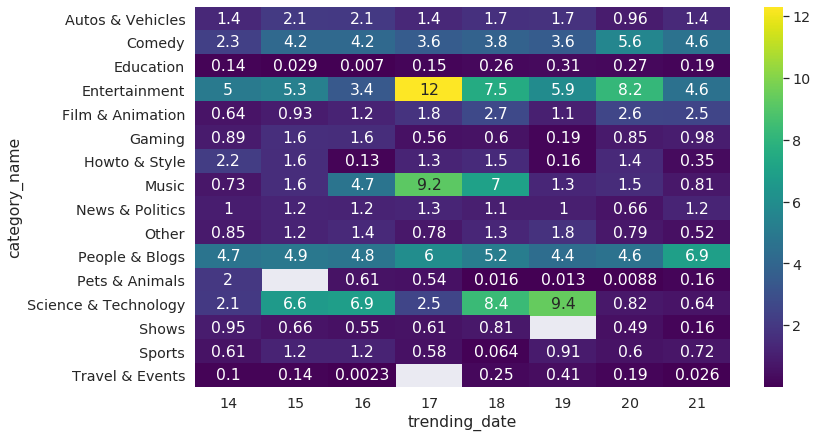

In [35]:
sns.set(font_scale=1.3)
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(ru_vid_pt / 10**6,
            annot=True,
            cmap="viridis");


Сделайте аналогичную сводную таблицу, добавив суммы по строкам и столбцам, назвав их "Всего просмотров".

In [36]:
ru_vid_pt_2 = pd.pivot_table(ru_vid_new,
                             values='views',
                             index=['category_name'],
                             columns=['trending_date'],
                             margins=True,
                             margins_name='Всего просмотров',
                             aggfunc=np.sum)
ru_vid_pt_2


trending_date,14,15,16,17,18,19,20,21,Всего просмотров
category_name,,,,,,,,,
Autos & Vehicles,1350890.0,2076443.0,2051608.0,1386676.0,1713087.0,1736740.0,962761.0,1421017.0,12699222
Comedy,2310887.0,4152389.0,4156893.0,3556025.0,3806238.0,3556578.0,5648120.0,4627423.0,31814553
Education,139723.0,28850.0,6963.0,146943.0,256076.0,310830.0,270585.0,186909.0,1346879
Entertainment,5010384.0,5289490.0,3373346.0,12299938.0,7519942.0,5877590.0,8174020.0,4585563.0,52130273
Film & Animation,636616.0,931837.0,1160112.0,1820958.0,2725012.0,1075440.0,2574276.0,2532978.0,13457229
Gaming,885597.0,1609621.0,1583149.0,557074.0,600307.0,193316.0,851814.0,981217.0,7262095
Howto & Style,2191619.0,1562421.0,129763.0,1250164.0,1468139.0,156958.0,1402284.0,350009.0,8511357
Music,733907.0,1585619.0,4720464.0,9179397.0,6972429.0,1329904.0,1527219.0,809274.0,26858213
News & Politics,1010044.0,1225112.0,1174092.0,1251367.0,1056007.0,1028665.0,657263.0,1214178.0,8616728


В чем проблема с информативностью подобных таблиц? Исправьте это.

*Подсказка*: посмотрите на графики, которые вы построили ранее. 

**Вывод:** <...>

---

### Задача 5

Yelp (yelp.com) — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

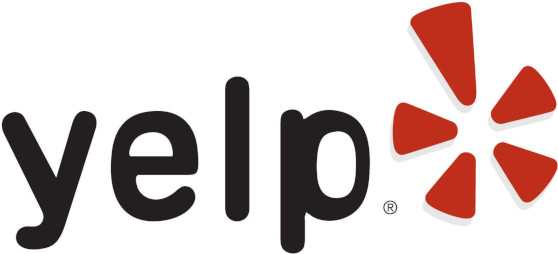

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате json можно посмотреть по ссылке
https://www.kaggle.com/yelp-dataset/yelp-dataset/data

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. Пример с несколько другой задачей: https://yandex.ru/company/researches/2017/msk_mobile_map
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [40]:
yelp_business = pd.read_csv('yelp_business.csv')
del yelp_business['Unnamed: 0']
yelp_business.head()


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. Для этого стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`. В таблице должен быть указан город (название) и количество компаний в этом городе.

In [41]:
yelp_business.groupby('city').count().sort_values('business_id', ascending=False).head()


,business_id,name,neighborhood,address,state,postal_code,latitude,longitude,is_open,categories
city,,,,,,,,,,
Las Vegas,26775,26775,21887,26775,26775,26655,26775,26775,26775,26775
Phoenix,17213,17213,0,17213,17213,17121,17213,17213,17213,17213
Toronto,17206,17206,14064,17206,17206,17102,17205,17205,17206,17206
Charlotte,8553,8553,5844,8553,8553,8517,8553,8553,8553,8553
Scottsdale,8228,8228,0,8228,8228,8201,8228,8228,8228,8228


Пусть N -- город с наибольшим количеством компаний.

Оставьте в таблице только записи, соответствующие городу N. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ -- долготу.

In [42]:
yelp_business_new = yelp_business[yelp_business['city'] == 'Las Vegas'].reset_index()
yelp_business_new


,index,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,1,Real Estate Services;Real Estate;Home Services...
1,7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1,Shopping;Sporting Goods
2,26,VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Southeast,"""5775 S Eastern, Ste 103""",Las Vegas,NV,89119,36.085051,-115.119421,1,Shopping;Jewelry;Watch Repair;Local Services
3,41,1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Spring Valley,"""7260 Cimarron Rd, Ste 130""",Las Vegas,NV,89113,36.056382,-115.269332,1,Home Services;Lighting Fixtures & Equipment;Lo...
4,48,DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",NaN,"""5340 Boulder Hwy""",Las Vegas,NV,89122,36.105196,-115.056880,1,Nurseries & Gardening;Home & Garden;Shopping
...,...,...,...,...,...,...,...,...,...,...,...,...
26770,174539,swjz4q8gI79Ndg4APuHEUA,"""Stonegate Real Estate Services""",Westside,"""3030 S Jones Blvd, Ste 105""",Las Vegas,NV,89146,36.134355,-115.224462,1,Real Estate Services;Home Services;Property Ma...
26771,174545,pUhU5ohYv65g8B47dTXAKA,"""Starbucks""",NaN,"""591 N Eastern Ave, Ste 110""",Las Vegas,NV,89101,36.173589,-115.116779,1,Coffee & Tea;Food
26772,174546,sH9WsMj8sNTTSAUWv4UEEg,"""Sprint Store""",Southwest,"""7325 S Rainbow Blvd, Ste 120""",Las Vegas,NV,89139,36.055130,-115.243488,1,Mobile Phone Accessories;Mobile Phones;Electro...
26773,174552,9ouC6BpmjFpLfHeQnLQqng,"""9 Dragons Fight Shop""",Westside,"""3375 S Decatur Blvd, Ste 7""",Las Vegas,NV,89102,36.128780,-115.208990,1,Martial Arts;Sports Wear;Men's Clothing;Sporti...


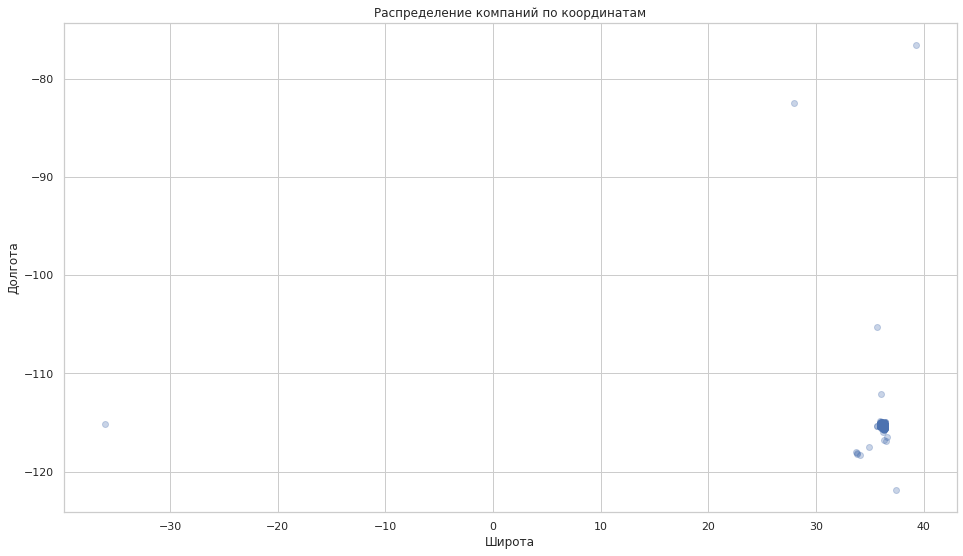

In [43]:
with sns.plotting_context("notebook"), sns.axes_style("whitegrid"):
    plt.figure(figsize=(16, 9))
    
    x = yelp_business_new.latitude
    y = yelp_business_new.longitude
    plt.scatter(x, y, alpha=0.3)
    

    plt.title('Распределение компаний по координатам')
    plt.xlabel('Широта')
    plt.ylabel('Долгота')
    plt.show()
    

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города N и сравните ее с построенным графиком.

Попробуйте также автоматически подгружать карту города в качестве фона графика. <a href="https://plotly.com/python/scattermapbox/">Примеры.</a>

In [44]:
up_quantile = 0.85
bottom_quantile = 0.15
lat_up = yelp_business_new.latitude.quantile(up_quantile)
lat_bot = yelp_business_new.latitude.quantile(bottom_quantile)
long_up = yelp_business_new.longitude.quantile(up_quantile)
long_bot = yelp_business_new.longitude.quantile(bottom_quantile)

las_vegas = yelp_business_new.copy()
las_vegas = las_vegas[las_vegas.latitude > lat_bot]
las_vegas = las_vegas[las_vegas.latitude < lat_up]
las_vegas = las_vegas[las_vegas.longitude > long_bot]
las_vegas = las_vegas[las_vegas.longitude < long_up].reset_index()

las_vegas


,level_0,index,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,5,49,_F3AMoo_zdl-he384ISQbw,"""Rock of Ages""",NaN,"""3700 W Flamingo Rd""",Las Vegas,NV,89109,36.116965,-115.185696,1,Arts & Entertainment;Performing Arts
1,9,59,Sx0C2RsDgrG3RxBBUoBqTw,"""Kool Radiator Service""",Westside,"""3228 Meade Ave""",Las Vegas,NV,89102,36.136639,-115.184585,1,Automotive;Auto Repair
2,10,60,v2GJWvZqEAjUc22hZUYzYw,"""John Armond Actor's Studio""",Westside,"""8125 W Sahara Ave, Ste 210""",Las Vegas,NV,89117,36.142544,-115.268731,1,Education;Performing Arts;Specialty Schools;Ar...
3,11,61,MmR06_kNAbmOPK-0pKvGtA,"""Cinnabon""",Westside,"""4300 Meadows Ln""",Las Vegas,NV,89107,36.172532,-115.197258,1,Food;Coffee & Tea;Desserts
4,12,82,bOOgAB_CEWWsxalAthnRSw,"""Tenors of Rock""",The Strip,"""3475 S Las Vegas Blvd""",Las Vegas,NV,89109,36.119310,-115.171770,1,Performing Arts;Arts & Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13159,26763,174427,UpW3jyJ3_kTG7oDSflwnMA,"""Archi's Thai Kitchen""",NaN,"""6360 W Flamingo Rd""",Las Vegas,NV,89103,36.114816,-115.230970,1,Restaurants;Thai
13160,26766,174455,Fv4EXwV30rwGD2NzN1ekgA,"""Gorilla Sushi""",Eastside,"""1801 E Tropicana Ave, Ste 2""",Las Vegas,NV,89119,36.100067,-115.127347,1,Asian Fusion;Restaurants;Japanese;Sushi Bars
13161,26768,174474,ZmNGlwy0MWnLVAT5qa31jw,"""Western Door and Gate""",NaN,"""4090 W Hacienda Ave, Ste 110""",Las Vegas,NV,89118,36.093946,-115.193811,1,Fences & Gates;Contractors;Garage Door Service...
13162,26770,174539,swjz4q8gI79Ndg4APuHEUA,"""Stonegate Real Estate Services""",Westside,"""3030 S Jones Blvd, Ste 105""",Las Vegas,NV,89146,36.134355,-115.224462,1,Real Estate Services;Home Services;Property Ma...


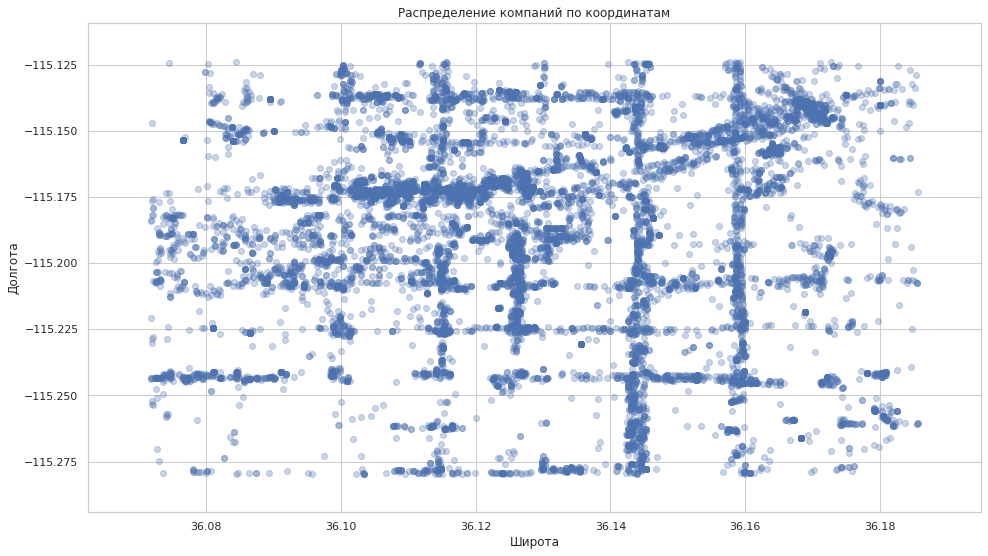

In [45]:
with sns.plotting_context("notebook"), sns.axes_style("whitegrid"):
    plt.figure(figsize=(16, 9))
    
    x = las_vegas.latitude
    y = las_vegas.longitude
    plt.scatter(x, y, alpha=0.3)
    
    plt.title('Распределение компаний по координатам')
    plt.xlabel('Широта')
    plt.ylabel('Долгота')
    plt.show()


#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [46]:
yelp_review = pd.read_csv('yelp_review.csv')
del yelp_review['Unnamed: 0']
yelp_review

,business_id,stars
0,AEx2SYEUJmTxVVB18LlCwA,5
1,VR6GpWIda3SfvPC-lg9H3w,5
2,CKC0-MOWMqoeWf6s-szl8g,5
3,ACFtxLv8pGrrxMm6EgjreA,4
4,s2I_Ni76bjJNK9yG60iD-Q,4
...,...,...
5261663,Ngk84Ax1tXgpoJFEGxot3w,1
5261664,pOEL97ld-FJMKO8Ki8JmYg,3
5261665,5ubokMNw8qfbX2WtxgJG1Q,4
5261666,EO3i5kTUG7_S2OIQ23sdSA,3


В подгруженной таблице оценок оставьте только компании города N. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [47]:
yelp_review = yelp_review.set_index('business_id').loc[las_vegas.business_id.tolist()].reset_index()
yelp_review


,business_id,stars
0,_F3AMoo_zdl-he384ISQbw,5
1,_F3AMoo_zdl-he384ISQbw,4
2,_F3AMoo_zdl-he384ISQbw,5
3,_F3AMoo_zdl-he384ISQbw,4
4,_F3AMoo_zdl-he384ISQbw,2
...,...,...
1049651,9ouC6BpmjFpLfHeQnLQqng,5
1049652,9ouC6BpmjFpLfHeQnLQqng,5
1049653,9ouC6BpmjFpLfHeQnLQqng,5
1049654,9ouC6BpmjFpLfHeQnLQqng,5


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [48]:
yelp_review = yelp_review.groupby('business_id').aggregate([np.mean, np.size])
yelp_review


stars      
                            mean  size
business_id                           
--9e1ONYQuAa-CB_Rrw7Tw  4.088904  1451
--DdmeR16TRb3LsjG0ejrQ  3.200000     5
--WsruI0IGEoeRmkErU5Gg  4.928571    14
--e8PjCNhEz32pprnPhCwQ  3.473684    19
--o5BoU7qYMALeVDK6mwVg  3.500000     6
...                          ...   ...
zymuRbVoLoJSSNdBDaFBXg  3.800000    10
zzO9QVUj-XvZ8trNX2lqAg  4.888889     9
zzOo9n22fBbKAhbSpMzggA  3.230769    26
zzjqFOujmM9surbMANZ_ag  5.000000     3
zzsKbL1KMNJqazSqBXskxQ  3.666667     6

[13164 rows x 2 columns]

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы.

In [49]:
yelp_review.columns = ['stars', 'count']
yelp_review


,stars,count
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--e8PjCNhEz32pprnPhCwQ,3.473684,19
--o5BoU7qYMALeVDK6mwVg,3.500000,6
...,...,...
zymuRbVoLoJSSNdBDaFBXg,3.800000,10
zzO9QVUj-XvZ8trNX2lqAg,4.888889,9
zzOo9n22fBbKAhbSpMzggA,3.230769,26


Соедините две полученные ранее таблицы по компаниям города N в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index` (в одной из них это уже должно было быть сделано).
Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

In [50]:
yelp_business_and_review = (las_vegas.set_index('business_id')).join(yelp_review)\
                        [['latitude', 'longitude', 'categories', 'name', 'stars', 'count']]
yelp_business_and_review


,latitude,longitude,categories,name,stars,count
business_id,,,,,,
_F3AMoo_zdl-he384ISQbw,36.116965,-115.185696,Arts & Entertainment;Performing Arts,"""Rock of Ages""",4.084507,213
Sx0C2RsDgrG3RxBBUoBqTw,36.136639,-115.184585,Automotive;Auto Repair,"""Kool Radiator Service""",3.555556,9
v2GJWvZqEAjUc22hZUYzYw,36.142544,-115.268731,Education;Performing Arts;Specialty Schools;Ar...,"""John Armond Actor's Studio""",4.416667,12
MmR06_kNAbmOPK-0pKvGtA,36.172532,-115.197258,Food;Coffee & Tea;Desserts,"""Cinnabon""",4.000000,3
bOOgAB_CEWWsxalAthnRSw,36.119310,-115.171770,Performing Arts;Arts & Entertainment,"""Tenors of Rock""",4.543478,46
...,...,...,...,...,...,...
UpW3jyJ3_kTG7oDSflwnMA,36.114816,-115.230970,Restaurants;Thai,"""Archi's Thai Kitchen""",3.994695,377
Fv4EXwV30rwGD2NzN1ekgA,36.100067,-115.127347,Asian Fusion;Restaurants;Japanese;Sushi Bars,"""Gorilla Sushi""",4.424490,245
ZmNGlwy0MWnLVAT5qa31jw,36.093946,-115.193811,Fences & Gates;Contractors;Garage Door Service...,"""Western Door and Gate""",3.857143,14


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

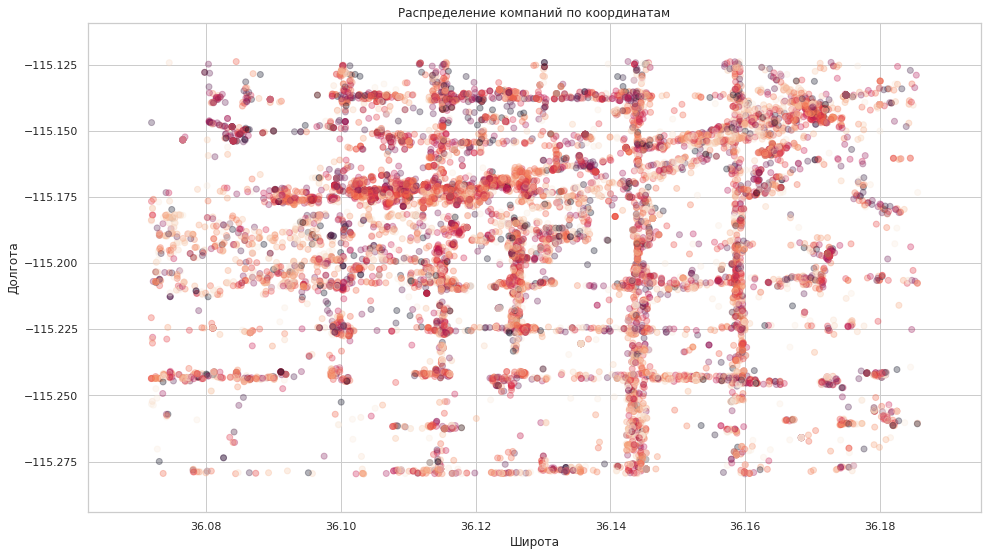

In [53]:
with sns.plotting_context("notebook"), sns.axes_style("whitegrid"):
    plt.figure(figsize=(16, 9))
    
    x = yelp_business_and_review.latitude
    y = yelp_business_and_review.longitude
    plt.scatter(x,
                y,
                alpha=0.3,
                c=yelp_business_and_review.stars/5)
    
    plt.title('Распределение компаний по координатам')
    plt.xlabel('Широта')
    plt.ylabel('Долгота')
    plt.show()
    

Чтобы получить районы города, округлите значения широты и долготы, подобрав оптимальный размер района. Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [54]:
yelp_business_and_review_r = yelp_business_and_review.copy()
yelp_business_and_review_r.latitude = np.round(yelp_business_and_review_r.latitude * 8, decimals=1) * 0.125
yelp_business_and_review_r.longitude = np.round(yelp_business_and_review_r.longitude * 8, decimals=1) * 0.125
yelp_business_and_review_r


,latitude,longitude,categories,name,stars,count
business_id,,,,,,
_F3AMoo_zdl-he384ISQbw,36.1125,-115.1875,Arts & Entertainment;Performing Arts,"""Rock of Ages""",4.084507,213
Sx0C2RsDgrG3RxBBUoBqTw,36.1375,-115.1875,Automotive;Auto Repair,"""Kool Radiator Service""",3.555556,9
v2GJWvZqEAjUc22hZUYzYw,36.1375,-115.2625,Education;Performing Arts;Specialty Schools;Ar...,"""John Armond Actor's Studio""",4.416667,12
MmR06_kNAbmOPK-0pKvGtA,36.1750,-115.2000,Food;Coffee & Tea;Desserts,"""Cinnabon""",4.000000,3
bOOgAB_CEWWsxalAthnRSw,36.1250,-115.1750,Performing Arts;Arts & Entertainment,"""Tenors of Rock""",4.543478,46
...,...,...,...,...,...,...
UpW3jyJ3_kTG7oDSflwnMA,36.1125,-115.2250,Restaurants;Thai,"""Archi's Thai Kitchen""",3.994695,377
Fv4EXwV30rwGD2NzN1ekgA,36.1000,-115.1250,Asian Fusion;Restaurants;Japanese;Sushi Bars,"""Gorilla Sushi""",4.424490,245
ZmNGlwy0MWnLVAT5qa31jw,36.1000,-115.2000,Fences & Gates;Contractors;Garage Door Service...,"""Western Door and Gate""",3.857143,14


Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений -- оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

In [55]:
yelp_pt = pd.pivot_table(yelp_business_and_review_r,
               values='stars',
               index=['longitude'],
               columns=['latitude'],
               aggfunc=np.mean)

yelp_pt


latitude,36.0750,36.0875,36.1000,36.1125,36.1250,36.1375,36.1500,36.1625,36.1750,36.1875
longitude,,,,,,,,,,
-115.2750,3.734188,3.407152,3.968718,3.992872,3.865603,3.839602,4.010097,3.831349,3.537891,NaN
-115.2625,3.449343,3.267968,4.505556,3.772170,4.167445,4.186540,4.025555,4.084275,3.944214,3.513713
-115.2500,3.982638,3.966790,3.303903,3.770370,3.164597,4.067836,3.951462,3.724740,3.522600,4.062772
-115.2375,3.920783,3.671373,3.750875,3.766603,3.702661,3.930731,3.936796,3.694932,3.821594,3.000000
-115.2250,4.086580,4.383181,3.415561,3.504605,3.696926,4.037469,3.482038,3.809133,3.984076,2.555556
-115.2125,3.565369,4.064503,3.376118,3.747290,3.852467,3.671987,3.686752,3.738104,4.016758,3.836712
-115.2000,3.701527,4.092650,3.685484,3.657213,3.588560,3.211779,3.712982,3.397130,3.229054,3.142857
-115.1875,4.220275,3.902144,3.717346,3.629066,3.851402,3.880556,3.737187,3.733180,3.633108,5.000000
-115.1750,3.772702,3.453970,3.385627,3.645073,3.713893,3.786319,3.845296,3.702621,2.963577,3.313249


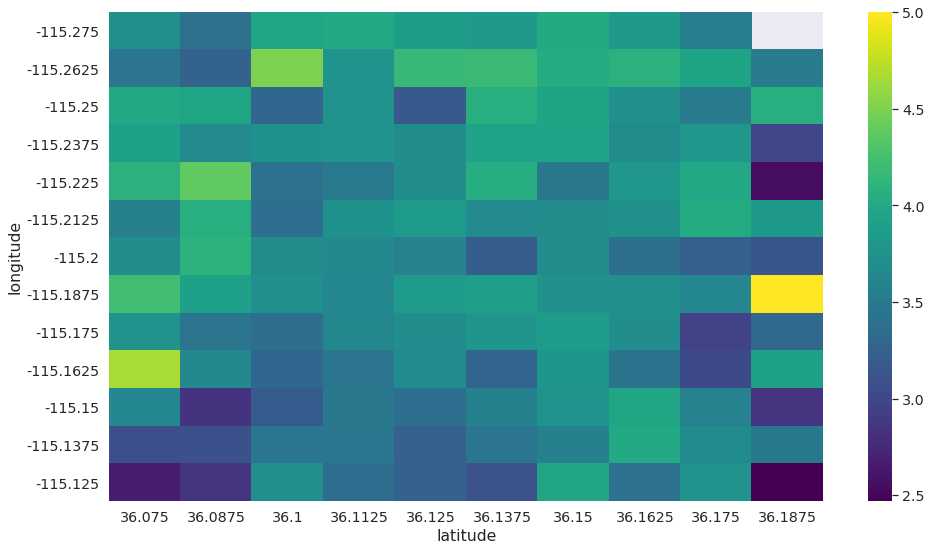

In [56]:
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(yelp_pt,
            ax=ax,
            cmap='viridis');


Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** При малом количестве компаний оценка менее субъективна. При автоматическом выборе цветовой гаммы, мы не различим визуально районы с близкими, но одинаковыми оценками.

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

In [57]:
yelp_pt_c = pd.pivot_table(yelp_business_and_review_r,
               values='stars',
               index=['longitude'],
               columns=['latitude'],
               fill_value=0,
               aggfunc=np.size)

yelp_pt = yelp_pt[yelp_pt_c >= 30]
yelp_pt


latitude,36.0750,36.0875,36.1000,36.1125,36.1250,36.1375,36.1500,36.1625,36.1750,36.1875
longitude,,,,,,,,,,
-115.2750,NaN,NaN,NaN,3.992872,3.865603,3.839602,4.010097,3.831349,NaN,NaN
-115.2625,NaN,NaN,NaN,3.772170,NaN,4.186540,4.025555,4.084275,3.944214,NaN
-115.2500,NaN,NaN,NaN,NaN,3.164597,4.067836,3.951462,3.724740,3.522600,NaN
-115.2375,3.920783,3.671373,3.750875,3.766603,3.702661,3.930731,3.936796,3.694932,3.821594,NaN
-115.2250,4.086580,NaN,3.415561,3.504605,3.696926,4.037469,3.482038,3.809133,NaN,NaN
-115.2125,3.565369,4.064503,3.376118,3.747290,3.852467,3.671987,3.686752,3.738104,4.016758,NaN
-115.2000,3.701527,4.092650,3.685484,3.657213,3.588560,NaN,3.712982,3.397130,3.229054,NaN
-115.1875,4.220275,3.902144,3.717346,3.629066,3.851402,3.880556,3.737187,3.733180,NaN,NaN
-115.1750,NaN,3.453970,3.385627,3.645073,3.713893,3.786319,3.845296,3.702621,2.963577,NaN


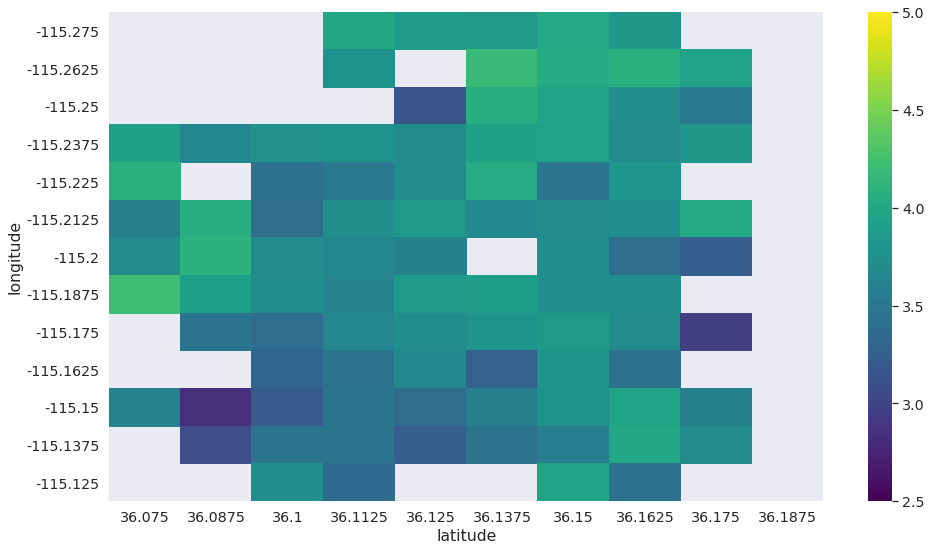

In [58]:
f, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(yelp_pt,
            vmin=2.5,
            vmax=5,
            ax=ax,
            cmap='viridis');


Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** Имеем график, который лучше отражает реальность. Лучше видны различия между районами.

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `Restaurant`. Составьте таблицу, в которой будет информация о всех ресторанах города N, для которых имеется не менее $5$ отзывов. Далее постройте график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [ ]:
...

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** <...>

Кот Василий очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
...

Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
...

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** <...>